
# Image segmentation using K-Means algorithm



Image segmentation is a computer vision problem that aims to partition an image into different areas of pixels that have similar attributes. This is done by generating a mask over the image that assigns a label to each pixel and where pixels with the same label are part of the same region.

 Image segmentation is mainly used to detect objects or edges in images, and has various applications such as the identification of cancer cells in medical tests, identification of bodies of interest in satellite images, among others.


<img src="https://dl.acm.org/cms/attachment/8542befb-3134-46f0-a5ad-1534c63188b4/csur5204-73-f01.jpg" title="Title text" width="80%" />
<center> <i> Figure 1. Example of Image Segmentation. </i> </center>



## Description


1. We will perform Image Segmentation using the K-Means algorithm for image1.jpg and image2.jpg
1.  We will graphically observe the result of the segmentation in both images where the clusters obtained are clearly distinguished.

 For point 1, before performing the segmentation we must perform a preprocessing of the images that consists of the following:
1.  First, the image must be vectorized by transforming the initial image of dimensions $p *{w}xp* {h}x3$ into a resulting array of dimensions $Kx3$, where $K= p *{h}p* {w}$ where $p_w$ and $p_h$ are the number of pixels in width and height of the photo respectively.
1.  Before applying the segmentation with K-Means, the values of the resulting array must be transformed from uint8 to float32 in order to apply the K-Means algorithm implemented in the cv2 library.

 Conclusions:
1.  An increase in the quality of the segmented image is noted as the number of clusters increases, this is because we could consider a normal image, for example, 20x20 as 400 points each belonging to a cluster, the more clusters we have in the segmentation, the more we are close to the original image. That is, we can capture greater detail of the image through more clusters, however the latter is almost never the objective of segmenting the image.
1.  To obtain an optimal result, for example for an autonomous vehicle to be able to detect important objects on a route, a cluster number should be considered that at least allows essential elements to be detected, such as: traffic signs, people, sidewalks, landscape and other vehicles.
1.  The algorithm can present flaws when some objects in the image have similar colors, since it segments them into the same cluster when they should be different. That is, the algorithm is only considering color information to detect the objects, it does not use spatial or shape information.


In [10]:
# Librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread("imagen1.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_format = img1.reshape((-1, 3))
img1_format = np.float32(img1_format)
img2 = cv2.imread("imagen2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_format = img2.reshape((-1, 3))
img2_format = np.float32(img2_format)


In [11]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1)
# Set flags (Just to avoid line break in the code)
# flags = cv2.KMEANS_RANDOM_CENTERS
attempts = 10

# Apply KMeans
# ret,label,center = cv2.kmeans(img1_format,k,None,criteria,10,flags)
######## IMAGEN 1 #########
k_1 = 4
ret_1, label_1, center_1 = cv2.kmeans(
    img1_format, k_1, None, criteria, attempts, cv2.KMEANS_PP_CENTERS
)
center_1 = np.uint8(center_1)
res_1 = center_1[label_1.flatten()]
result_1 = res_1.reshape((img1.shape))


######## IMAGEN 2 #########
k_2 = 7
ret_2, label_2, center_2 = cv2.kmeans(
    img2_format, k_2, None, criteria, attempts, cv2.KMEANS_PP_CENTERS
)
center_2 = np.uint8(center_2)
res_2 = center_2[label_2.flatten()]
result_2 = res_2.reshape((img2.shape))


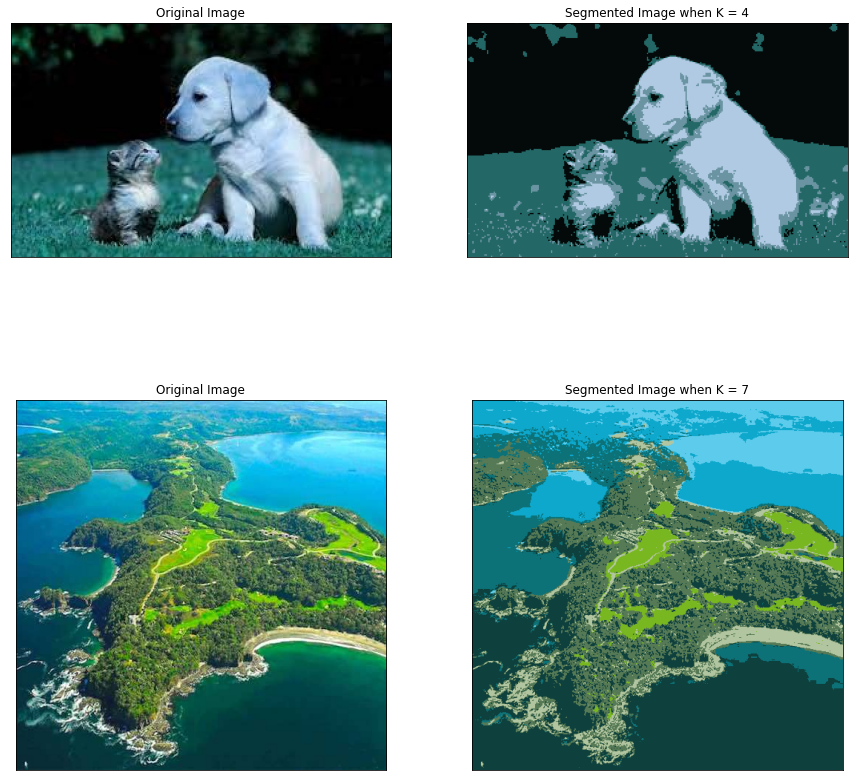

In [12]:
figure_size = 15
plt.figure(figsize=(figure_size, figure_size))
plt.subplot(2, 2, 1), plt.imshow(img1)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(result_1)
plt.title("Segmented Image when K = %i" % k_1), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(img2)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(result_2)
plt.title("Segmented Image when K = %i" % k_2), plt.xticks([]), plt.yticks([])
plt.show()
